### Short description of this data

After cleaning:
KenCurtisCities dataset contains **annually average temp** of **332 cities** from **137 countries** located in **6 different continents** from **1891 to 2013**.
-- no missing values. **42435** observations in total.


city_data contains all the individual data such as 'dellas_avgtemps.csv' and 'denver_avgtemp.csv'
So we only need to work on the city_data

city_data contains some missing avg_temp values, however, these missing values are all before 1891, and 1891 to 2013 is enough,
So I only keep values after and include 1890.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

In [35]:
city_data = pd.read_csv('./Datasets/DataWorld/KenCurtisCities1820-2015/city_data.csv')

In [3]:
city_list = pd.read_csv('./Datasets/DataWorld/KenCurtisCities1820-2015/city_list.csv')

In [4]:
dellas_avgtemps = pd.read_csv('./Datasets/DataWorld/KenCurtisCities1820-2015/dallas_avgtemps.csv')

In [5]:
denver_avgtemp = pd.read_csv('./Datasets/DataWorld/KenCurtisCities1820-2015/denver_avgtemp.csv')

In [6]:
global_results = pd.read_csv('./Datasets/DataWorld/KenCurtisCities1820-2015/global_results.csv')

In [7]:
okc_results = pd.read_csv('./Datasets/DataWorld/KenCurtisCities1820-2015/okc_results.csv')

In [8]:
seattle_avgtemps = pd.read_csv('./Datasets/DataWorld/KenCurtisCities1820-2015/seattle_avgtemps.csv')

In [28]:

# using libary geopy to findout the longitude and latitude of each city

# creating empty list to append on later.
lon = []
lat = []

# function for looking up the country
# if the city is not found, return None
def findGeocode(city):
    try:
        geolocator = Nominatim(user_agent="trevorczc@gmail.com")
        return geolocator.geocode(city)

    except:
        return findGeocode(city)
    
for i in (city_list['city']):
    if findGeocode(i) != None:
        loc = findGeocode(i)
        
        lon.append(loc.latitude)
        lat.append(loc.longitude)
    
    else:
        lon.append(np.nan)
        lat.append(np.nan)

# add 2 new columns in city_list for lon and lat
city_list['lon'] = lon
city_list['lat'] = lat

In [30]:
city_list.isnull().sum()

city         0
country      0
lon          0
lat          0
continent    0
dtype: int64

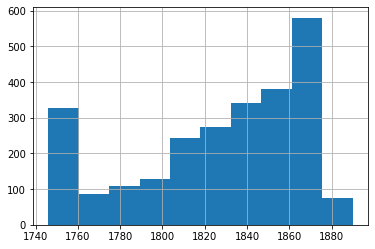

In [36]:
# there are a some missing values for avg_temp
# display which years have the most missing values

city_data[city_data['avg_temp'].isnull()]['year'].hist();

In [37]:
city_data[city_data['avg_temp'].isnull()]['year'].describe()

count    2547.000000
mean     1826.332548
std        41.212616
min      1746.000000
25%      1802.000000
50%      1836.000000
75%      1862.000000
max      1890.000000
Name: year, dtype: float64

In [38]:
# Since all the missing data are from years before 1890, then we will just keep the data after 1890
city_data = city_data[city_data['year']>1890]

In [39]:
# now the city_data only contains data from 1891 - 2013
# check whether it contains every years data from 1891 - 2013, concers about skipped any year or city

city_data_years = city_data['year'].unique()
if len(city_data_years) != (2013-1891+1):
    print('There are years skipped')

#since the len the unique values = 123, then we can confirm that no year is skipped overall.

# now, check if any city skipped any year
city_data_cities = city_data['city'].unique()

for city in city_data_cities:
    unique_years = city_data[city_data['city'] == city]['year'].unique()
    for year in city_data_years:
        if year not in unique_years:
            print(f'This datasets miss {city} for year of {year}')
        else:
            pass
          
# since thera is not output, no year skipped overall and for any city.

In [40]:
# using pycountry_convert library find each countries continent
# find each country's continent name
def get_continent(country):
    try:
        country_code =  country_name_to_country_alpha2(country)
        country_continent = country_alpha2_to_continent_code(country_code)
        return country_continent
    except:
        return np.nan
    

city_list['continent'] = city_list['country'].map(get_continent)

In [41]:
# there are four contries' name are not matching with the pycountry_convert library, so add them manually.
city_list.loc[city_list[city_list['country'] == "Côte D'Ivoire"].index,'continent'] = 'AF'
city_list.loc[city_list[city_list['country'] == "Guinea Bissau"].index,'continent'] = 'AF'
city_list.loc[city_list[city_list['country'] == "Congo (Democratic Republic Of The)"].index,'continent'] = 'AF'
city_list.loc[city_list[city_list['country'] == "Bosnia And Herzegovina"].index,'continent'] = 'EU'

In [42]:
# merge the city_data and city_list to get the lon and lat for each row.
df = pd.merge(city_data, city_list,how='left',left_on=['city','country'], right_on=['city','country'])

In [43]:
df = df[['continent','country','city','lat','lon','year','avg_temp']]

In [44]:
df.rename({'avg_temp':'mean_temp'}, axis=1, inplace=True)

In [45]:
df.head()

,continent,country,city,lat,lon,year,mean_temp
0,AF,Côte D'Ivoire,Abidjan,-4.016107,5.320357,1891,25.11
1,AF,Côte D'Ivoire,Abidjan,-4.016107,5.320357,1892,25.17
2,AF,Côte D'Ivoire,Abidjan,-4.016107,5.320357,1893,25.33
3,AF,Côte D'Ivoire,Abidjan,-4.016107,5.320357,1894,25.04
4,AF,Côte D'Ivoire,Abidjan,-4.016107,5.320357,1895,25.37


In [46]:
df['country'].nunique()

137

In [47]:
df['city'].nunique()

332

In [48]:
df['continent'].nunique()

6

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42435 entries, 0 to 42434
Data columns (total 7 columns):
continent    42435 non-null object
country      42435 non-null object
city         42435 non-null object
lat          42435 non-null float64
lon          42435 non-null float64
year         42435 non-null int64
mean_temp    42435 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [50]:
df.to_csv('KenCurtisCities_cleaned.csv',)

In [51]:
df.head()

,continent,country,city,lat,lon,year,mean_temp
0,AF,Côte D'Ivoire,Abidjan,-4.016107,5.320357,1891,25.11
1,AF,Côte D'Ivoire,Abidjan,-4.016107,5.320357,1892,25.17
2,AF,Côte D'Ivoire,Abidjan,-4.016107,5.320357,1893,25.33
3,AF,Côte D'Ivoire,Abidjan,-4.016107,5.320357,1894,25.04
4,AF,Côte D'Ivoire,Abidjan,-4.016107,5.320357,1895,25.37


In [54]:
df.isnull().sum()

continent    0
country      0
city         0
lat          0
lon          0
year         0
mean_temp    0
dtype: int64